<a href="https://colab.research.google.com/github/ManishEnishetty97/DeepLearning-HW1/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torchvision
import pandas as pd
from torchsummary import summary
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np

In [ ]:
from torchvision import transforms,datasets

In [ ]:
train=datasets.MNIST("",train=True,download=True,transform=transforms.Compose([transforms.ToTensor()]))
test=datasets.MNIST("",train=False,download=True,transform=transforms.Compose([transforms.ToTensor()]))

Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw


Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw



Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw


Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw
Processing...


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Done!


In [ ]:
trainset=torch.utils.data.DataLoader(train,batch_size=100,shuffle=True)
testset=torch.utils.data.DataLoader(train,batch_size=100,shuffle=True)

In [ ]:
for data in trainset:
    break

In [ ]:
x,y=data[0][0],data[1][0]

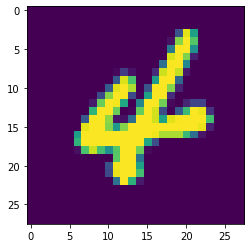

In [ ]:


plt.imshow(data[0][0].view(28,28))
plt.show()

In [ ]:
print(data[0][0].shape)

torch.Size([1, 28, 28])


In [ ]:
counter_dict={0:0,1:0,0:0,1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:0,9:0}

for data in trainset:
    xs,ys=data
    for y in ys:
        counter_dict[int(y)]+=1
        
print(counter_dict)

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [ ]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1=nn.Linear(784,200)
        self.fc2=nn.Linear(200,100)
        self.fc3=nn.Linear(100,50)
        self.fc4=nn.Linear(50,10)
    def forward(self,x):
        x=self.fc1(x)
        x=F.relu(self.fc2(x))
        x=F.relu(self.fc3(x))
        x=self.fc4(x)
        return F.log_softmax(x,dim=1 )
        
net=Net()
print(net)
#summary(net,(1,784))

optimizer=optim.SGD(net.parameters(),lr=0.001)
losses=[]
train_counter=[]
EPOCHS=8
count=0
final_weights={}


for epoch in range(EPOCHS):
    for data in trainset:
        X,y=data
        net.zero_grad()
        output=net(X.view(-1,28*28))
        loss=F.nll_loss(output,y)
        losses.append(loss)
        loss.backward()
        optimizer.step()
        train_counter.append((count*64) + ((epoch-1)*len(trainset.dataset)))
        count=count+1
    
    if epoch%3==0:
        first_layer=torch.flatten(net.fc1.weight)
        print(first_layer.dtype)
        second_layer=torch.flatten(net.fc2.weight)
        third_layer=torch.flatten(net.fc3.weight)
        fourth_layer=torch.flatten(net.fc4.weight)
        final_weights[epoch/3]=torch.cat((first_layer, second_layer, third_layer,fourth_layer), 0)
        print(net.fc1.weight)
        print(net.fc2.weight)
        print(net.fc3.weight)
        print("weights after backpropagation ",final_weights[epoch/3])
           
    print("printing loss",loss)




Net(
  (fc1): Linear(in_features=784, out_features=200, bias=True)
  (fc2): Linear(in_features=200, out_features=100, bias=True)
  (fc3): Linear(in_features=100, out_features=50, bias=True)
  (fc4): Linear(in_features=50, out_features=10, bias=True)
)
weights after tensor([ 0.0139,  0.0228, -0.0157,  ..., -0.0521,  0.0120, -0.0774],
       grad_fn=<CatBackward>)
printing loss tensor(2.3048, grad_fn=<NllLossBackward>)
printing loss tensor(2.2842, grad_fn=<NllLossBackward>)
printing loss tensor(2.2881, grad_fn=<NllLossBackward>)
weights after tensor([ 0.0139,  0.0228, -0.0157,  ..., -0.0519,  0.0070, -0.0779],
       grad_fn=<CatBackward>)
printing loss tensor(2.2713, grad_fn=<NllLossBackward>)
printing loss tensor(2.2581, grad_fn=<NllLossBackward>)
printing loss tensor(2.2379, grad_fn=<NllLossBackward>)
weights after tensor([ 0.0139,  0.0228, -0.0157,  ..., -0.0517, -0.0007, -0.0822],
       grad_fn=<CatBackward>)
printing loss tensor(2.2295, grad_fn=<NllLossBackward>)
printing loss ten

In [ ]:
class Net2(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1=nn.Linear(784,30)
        self.fc2=nn.Linear(30,20)
        self.fc3=nn.Linear(20,10)
    def forward(self,x):
        x=self.fc1(x)
        x=F.relu(self.fc2(x))
        x=self.fc3(x)
        return F.log_softmax(x,dim=1 )
net2=Net2()

print(net2)
#summary(net2,(1,784))


import torch.optim as optim
optimizer=optim.Adam(net.parameters(),lr=0.01)
losses2=[]
train_counter=[]
EPOCHS=8
count=0
final_weights2={}



for epoch in range(EPOCHS):
  for data in trainset:

      X,y=data
      net2.zero_grad()
      output=net2(X.view(-1,28*28))
      loss=F.nll_loss(output,y)
      losses2.append(loss)
      loss.backward()
      optimizer.step()
      train_counter.append((count*64) + ((epoch-1)*len(trainset.dataset)))
      count=count+1

   
  if epoch%3==0:
     first_layer=torch.flatten(net2.fc1.weight)
        #print(first_layer.dtype)
     second_layer=torch.flatten(net2.fc2.weight)
     third_layer=torch.flatten(net2.fc3.weight)
     final_weights2[epoch/3]=torch.cat((first_layer, second_layer, third_layer), 0)
        #print(net.fc1.weight)
        #print(net.fc2.weight)
        #print(net.fc3.weight)
     print(final_weights2[epoch/3])
     print("printing loss",loss)



Net2(
  (fc1): Linear(in_features=784, out_features=30, bias=True)
  (fc2): Linear(in_features=30, out_features=20, bias=True)
  (fc3): Linear(in_features=20, out_features=10, bias=True)
)
tensor([-0.0225, -0.0072, -0.0354,  ...,  0.1317, -0.1668,  0.0813],
       grad_fn=<CatBackward>)
printing loss tensor(2.3169, grad_fn=<NllLossBackward>)
tensor([-0.0225, -0.0072, -0.0354,  ...,  0.1317, -0.1668,  0.0813],
       grad_fn=<CatBackward>)
printing loss tensor(2.2958, grad_fn=<NllLossBackward>)
tensor([-0.0225, -0.0072, -0.0354,  ...,  0.1317, -0.1668,  0.0813],
       grad_fn=<CatBackward>)
printing loss tensor(2.3340, grad_fn=<NllLossBackward>)


In [ ]:
class Net3(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1=nn.Linear(784,16)
        self.fc2=nn.Linear(16,10)
        self.fc3=nn.Linear(10,10)
    def forward(self,x):
        x=self.fc1(x)
        x=F.relu(self.fc2(x))
        x=self.fc3(x)
        return F.log_softmax(x,dim=1 )
        
net3=Net3()
optimizer=optim.SGD(net3.parameters(),lr=0.002)
EPOCHS=8
losses3=[]
train_counter3=[]
count=0
final_weights3={}
    
for epoch in range(EPOCHS):
    for data in trainset:
        X,y=data
        net3.zero_grad()
        output=net3(X.view(-1,28*28))
        loss=F.nll_loss(output,y)
        losses3.append(loss)
        loss.backward()
        optimizer.step()
        train_counter.append((count*64) + ((epoch-1)*len(trainset.dataset)))
        count=count+1

    
        
    if epoch%3==0:
        first_layer=torch.flatten(net3.fc1.weight)
        #print(first_layer.dtype)
        second_layer=torch.flatten(net3.fc2.weight)
        third_layer=torch.flatten(net3.fc3.weight)
        final_weights3[epoch/3]=torch.cat((first_layer, second_layer, third_layer), 0)
        #print(net.fc1.weight)
        #print(net.fc2.weight)
        #print(net.fc3.weight)
        print("weights after",final_weights3[epoch/3])
        
        
   
    print("printing loss",loss)
    

weights after tensor([ 0.0109, -0.0283,  0.0008,  ...,  0.1751, -0.1127,  0.0639],
       grad_fn=<CatBackward>)
printing loss tensor(2.2260, grad_fn=<NllLossBackward>)
printing loss tensor(2.1601, grad_fn=<NllLossBackward>)
printing loss tensor(1.9856, grad_fn=<NllLossBackward>)
weights after tensor([ 0.0109, -0.0283,  0.0008,  ...,  0.1152, -0.2346,  0.0637],
       grad_fn=<CatBackward>)
printing loss tensor(1.7216, grad_fn=<NllLossBackward>)
printing loss tensor(1.5328, grad_fn=<NllLossBackward>)
printing loss tensor(1.1957, grad_fn=<NllLossBackward>)
weights after tensor([ 0.0109, -0.0283,  0.0008,  ...,  0.0298, -0.4272,  0.0629],
       grad_fn=<CatBackward>)
printing loss tensor(1.1034, grad_fn=<NllLossBackward>)
printing loss tensor(0.9206, grad_fn=<NllLossBackward>)


In [ ]:
class Net4(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1=nn.Linear(784,200)
        self.fc2=nn.Linear(200,100)
        self.fc3=nn.Linear(100,50)
        self.fc4=nn.Linear(50,10)
    def forward(self,x):
        x=self.fc1(x)
        x=F.relu(self.fc2(x))
        x=F.relu(self.fc3(x))
        x=self.fc4(x)
        return F.log_softmax(x,dim=1 )
net4=Net4()
print(net4)
optimizer=optim.SGD(net4.parameters(),lr=0.002)
losses4=[]
train_counter4=[]
count=0
final_weights4={}


for epoch in range(EPOCHS):
    for data in trainset:
        X,y=data
        net4.zero_grad()
        output=net4(X.view(-1,28*28))
        loss=F.nll_loss(output,y)
        losses4.append(loss)
        loss.backward()
        optimizer.step()
        train_counter.append((count*64) + ((epoch-1)*len(trainset.dataset)))
        count=count+1

    
        
    if epoch%3==0:
        first_layer=torch.flatten(net4.fc1.weight)
        #print(first_layer.dtype)
        second_layer=torch.flatten(net4.fc2.weight)
        third_layer=torch.flatten(net4.fc3.weight)
        fourth_layer=torch.flatten(net4.fc4.weight)
        final_weights4[epoch/3]=torch.cat((first_layer, second_layer, third_layer,fourth_layer), 0)
        #print(net.fc1.weight)
        #print(net.fc2.weight)
        #print(net.fc3.weight)
        #print(net.fc4.weight)
        print(final_weights4[epoch/3])
         
        
   
    print("printing loss",loss)

Net4(
  (fc1): Linear(in_features=784, out_features=200, bias=True)
  (fc2): Linear(in_features=200, out_features=100, bias=True)
  (fc3): Linear(in_features=100, out_features=50, bias=True)
  (fc4): Linear(in_features=50, out_features=10, bias=True)
)
tensor([ 0.0256,  0.0134, -0.0194,  ..., -0.1198, -0.0411,  0.1300],
       grad_fn=<CatBackward>)
printing loss tensor(2.2828, grad_fn=<NllLossBackward>)
printing loss tensor(2.2521, grad_fn=<NllLossBackward>)
printing loss tensor(2.1825, grad_fn=<NllLossBackward>)
tensor([ 0.0256,  0.0134, -0.0194,  ..., -0.1420, -0.0223,  0.1743],
       grad_fn=<CatBackward>)
printing loss tensor(2.1193, grad_fn=<NllLossBackward>)
printing loss tensor(1.8788, grad_fn=<NllLossBackward>)
printing loss tensor(1.6394, grad_fn=<NllLossBackward>)
tensor([ 0.0256,  0.0134, -0.0194,  ..., -0.1935,  0.0411,  0.3191],
       grad_fn=<CatBackward>)
printing loss tensor(1.3346, grad_fn=<NllLossBackward>)
printing loss tensor(1.1640, grad_fn=<NllLossBackward>)


In [ ]:
class Net5(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1=nn.Linear(784,160)
        self.fc2=nn.Linear(160,90)
        self.fc3=nn.Linear(90,10)
    def forward(self,x):
        x=self.fc1(x)
        x=F.relu(self.fc2(x))
        x=self.fc3(x)
        return F.log_softmax(x,dim=1 )
        
net5=Net5()
optimizer=optim.Adam(net3.parameters(),lr=1e-3)
EPOCHS=8
losses5=[]
train_counter5=[]
count=0
final_weights5={}
    
for epoch in range(EPOCHS):
    for data in trainset:
        X,y=data
        net5.zero_grad()
        output=net5(X.view(-1,28*28))
        loss=F.nll_loss(output,y)
        losses5.append(loss)
        loss.backward()
        optimizer.step()
        train_counter5.append((count*64) + ((epoch-1)*len(trainset.dataset)))
        count=count+1

    
        
    if epoch%3==0:
        first_layer=torch.flatten(net5.fc1.weight)
        #print(first_layer.dtype)
        second_layer=torch.flatten(net5.fc2.weight)
        third_layer=torch.flatten(net5.fc3.weight)
        final_weights5[epoch/3]=torch.cat((first_layer, second_layer, third_layer), 0)
        #print(net.fc1.weight)
        #print(net.fc2.weight)
        #print(net.fc3.weight)
        print("weights after",final_weights5[epoch/3])
        
        
   
    print("printing loss",loss)
    

weights after tensor([-0.0331, -0.0302, -0.0253,  ..., -0.0845,  0.0443, -0.0069],
       grad_fn=<CatBackward>)
printing loss tensor(2.3041, grad_fn=<NllLossBackward>)
printing loss tensor(2.3035, grad_fn=<NllLossBackward>)
printing loss tensor(2.3204, grad_fn=<NllLossBackward>)
weights after tensor([-0.0331, -0.0302, -0.0253,  ..., -0.0845,  0.0443, -0.0069],
       grad_fn=<CatBackward>)
printing loss tensor(2.3045, grad_fn=<NllLossBackward>)
printing loss tensor(2.3093, grad_fn=<NllLossBackward>)
printing loss tensor(2.3244, grad_fn=<NllLossBackward>)
weights after tensor([-0.0331, -0.0302, -0.0253,  ..., -0.0845,  0.0443, -0.0069],
       grad_fn=<CatBackward>)
printing loss tensor(2.3111, grad_fn=<NllLossBackward>)
printing loss tensor(2.3216, grad_fn=<NllLossBackward>)


In [ ]:

    
import csv

w = csv.writer(open("output.csv", "w"))
for key, val in final_weights.items():
    w.writerow([key, val])    
f = open("op.txt","w")
f.write( str(final_weights) )
f.close()
#np.savetxt("test_file.txt", final_weights[], fmt = "%f")
#final_weights.to_csv('output_weights.csv')

Text(0, 0.5, 'Principal Component2')

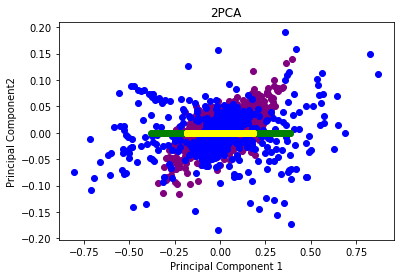

In [ ]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

dataMatrix = np.array([final_weights[i].detach().numpy() for i in range(3)])
x=StandardScaler().fit_transform(dataMatrix).T


dataMatrix2 = np.array([final_weights2[i].detach().numpy() for i in range(3)])
X2 = dataMatrix2.transpose()
#y=StandardScaler().fit_transform(dataMatrix2).T #second model

dataMatrix3 = np.array([final_weights3[i].detach().numpy() for i in range(3)])
x3=dataMatrix3.transpose()

dataMatrix4 = np.array([final_weights4[i].detach().numpy() for i in range(3)])
x4=dataMatrix4.transpose() 

dataMatrix5 = np.array([final_weights5[i].detach().numpy() for i in range(3)])
x5=dataMatrix5.transpose() 

from sklearn.decomposition import PCA 
pca= PCA(n_components=2)

pc_comp=pca.fit_transform(x)
pc_comp2=pca.fit_transform(X2)
pc_comp3=pca.fit_transform(x3)
pc_comp4=pca.fit_transform(x4)
pc_comp5=pca.fit_transform(x5)

#plt.scatter(pc_comp[:,0],pc_comp[:,1],color="red")
plt.scatter(pc_comp4[:,0],pc_comp4[:,1],color="purple")
plt.scatter(pc_comp3[:,0],pc_comp3[:,1],color="blue")
plt.scatter(pc_comp2[:,0],pc_comp2[:,1],color="green")
plt.scatter(pc_comp5[:,0],pc_comp5[:,1],color="yellow")

plt.title('2PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component2')

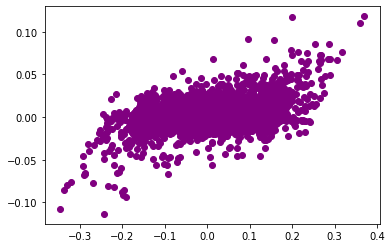

In [ ]:
plt.scatter(pc_comp4[:,0],pc_comp4[:,1],color="purple")

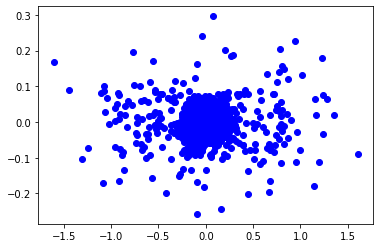

In [ ]:
plt.scatter(pc_comp3[:,0],pc_comp3[:,1],color="blue")


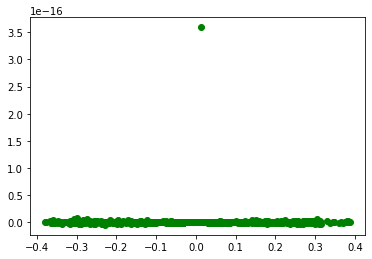

In [ ]:
plt.scatter(pc_comp2[:,0],pc_comp2[:,1],color="green")


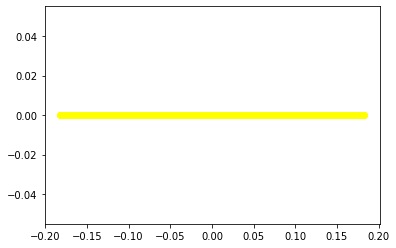

In [ ]:
plt.scatter(pc_comp5[:,0],pc_comp5[:,1],color="yellow")


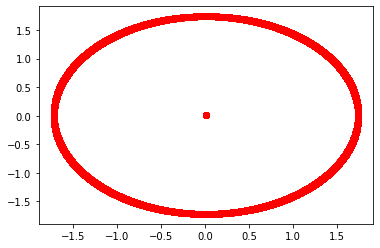

In [ ]:
plt.scatter(pc_comp[:,0],pc_comp[:,1],color="red")
